# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/bbhatt001/human-microbiome-project

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

hmp_df = pd.read_csv("hmp_cleaned-Copy1.csv")

sites_df = pd.read_csv("hmp_sites-Copy1.csv")

combo_df = hmp_df.append(sites_df)
combo_df.info()
combo_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2931 entries, 0 to 15
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2931 non-null   int64  
 1   HMP ID                   2915 non-null   float64
 2   Organism Name            2915 non-null   object 
 3   Domain                   2915 non-null   object 
 4   NCBI Superkingdom        2915 non-null   object 
 5   HMP Isolation Body Site  2915 non-null   object 
 6   Project Status           2915 non-null   object 
 7   NCBI Submission Status   2915 non-null   object 
 8   NCBI Project ID          2915 non-null   float64
 9   Gene Count               2915 non-null   float64
 10  IMG/HMP ID               2915 non-null   float64
 11  Funding Source           2915 non-null   object 
 12  Name Category            2915 non-null   object 
 13  Name Details             2915 non-null   object 
 14  Location                 1

,Unnamed: 0,HMP ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,NCBI Submission Status,NCBI Project ID,Gene Count,IMG/HMP ID,Funding Source,Name Category,Name Details,Location,X,Y
0,0,1.0,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,6. annotation (and sequence) public on NCBI site,33011.0,1950.0,643886181.0,NIH-HMP Jumpstart Supplement,Abiotrophia,defectiva ATCC 49176,NaN,NaN,NaN
1,1,4.0,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,6. annotation (and sequence) public on NCBI site,46343.0,5755.0,647000200.0,NIH-HMP Jumpstart Supplement,Achromobacter,piechaudii ATCC 43553,NaN,NaN,NaN
2,2,5.0,Achromobacter xylosoxidans C54,BACTERIAL,Bacteria,airways,Complete,6. annotation (and sequence) public on NCBI site,38739.0,6010.0,0.0,NIH-HMP Jumpstart Supplement,Achromobacter,xylosoxidans C54,NaN,NaN,NaN
3,3,10.0,Acinetobacter baumannii ATCC 19606,BACTERIAL,Bacteria,urogenital_tract,Complete,6. annotation (and sequence) public on NCBI site,38509.0,3832.0,647533101.0,NIH-HMP Jumpstart Supplement,Acinetobacter,baumannii ATCC 19606,NaN,NaN,NaN
4,4,12.0,Acinetobacter calcoaceticus RUH2202,BACTERIAL,Bacteria,skin,Complete,6. annotation (and sequence) public on NCBI site,38337.0,3632.0,646206267.0,NIH-HMP Jumpstart Supplement,Acinetobacter,calcoaceticus RUH2202,NaN,NaN,NaN


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

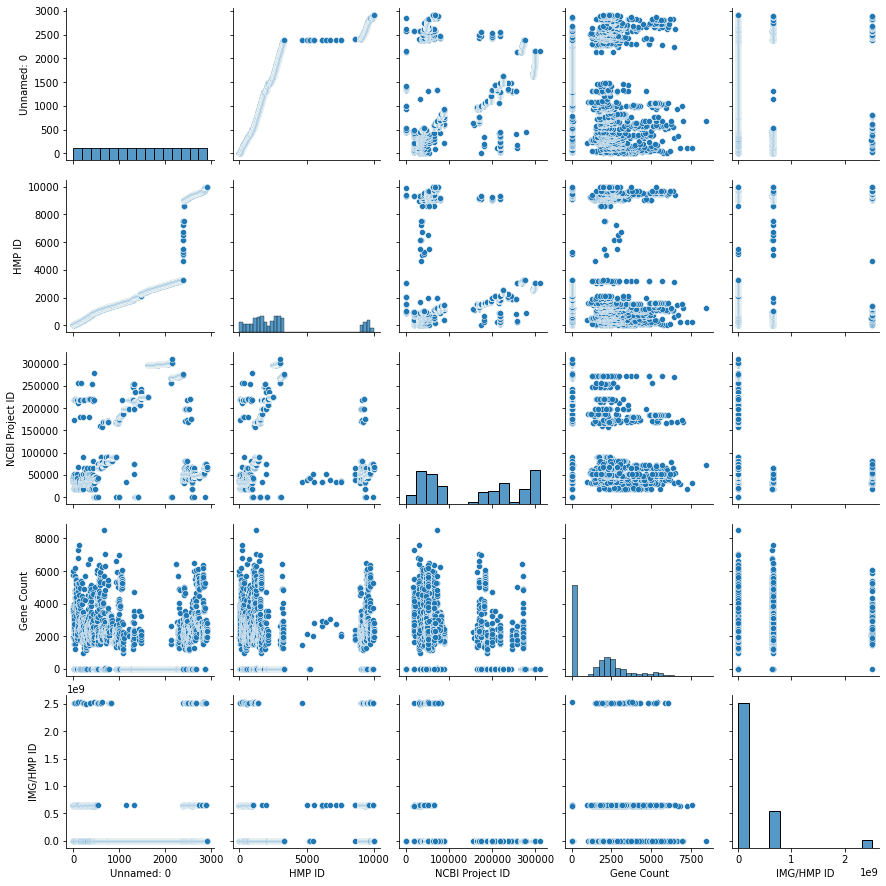

In [33]:
sns.pairplot(hmp_df)
# sns.pairplot(combo_df, x_vars='Gene Count', hue='Name Category')
plt.show()

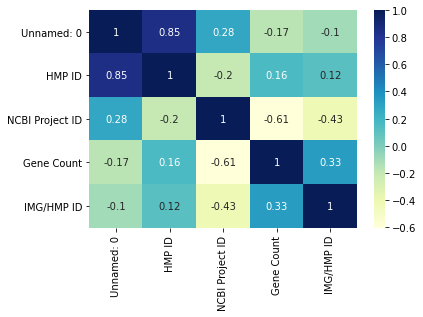

In [34]:
# sns.heatmap(combo_df.corr(), cmap="YlGnBu", annot = True)
sns.heatmap(hmp_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [35]:
X = hmp_df['Gene Count']
Y = hmp_df['IMG/HMP ID']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train
Y_train

1389            0
2596            0
89      643886216
1435            0
1053            0
          ...    
718             0
766             0
923             0
2084            0
2475            0
Name: IMG/HMP ID, Length: 2186, dtype: int64

In [37]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(Y_train, X_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             IMG/HMP ID   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     261.3
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.33e-55
Time:                        10:46:59   Log-Likelihood:                -46829.
No. Observations:                2186   AIC:                         9.366e+04
Df Residuals:                    2184   BIC:                         9.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.777e+07   1.39e+07      4.870      0.000    4.05e+07    9.51e+07
Gene Count  1.006e+05   6224.945     16.164      0.000    8.84e+04    1.13e+05
==============================================================================
Omnibus:                     1448.282   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15441.805
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      14.454   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

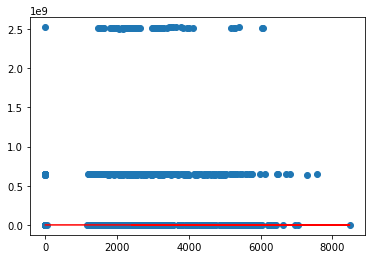

In [38]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, -43440 + 0.0592*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [39]:
Y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the Y_train data and predicted Y_data
res = (Y_train - Y_train_pred)

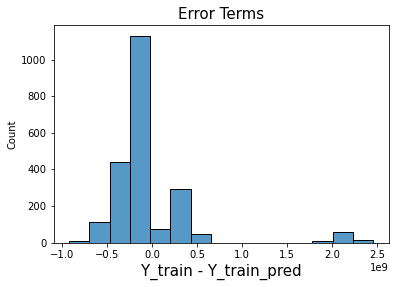

In [42]:
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('Y_train - Y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.107
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? This is a resounding no for me. The only numerical values in the data at this point are study IDs, except for the 'Gene Count" column. Any analysis of these ID figures will be arbitrary as they are all independent variables. I had experiemented with combining the hmp dataset with the x and y coordinates I created for mapping the body parts onto an image in Tableau. I thought this would be a means of using linear regression to find something meaningful about the realtionship between abundance and body locations, as one example. However, combining the dataframes of these two datasets did not prove to be fruitful for linear regrassion analysis. Pairplotting the combinded dataframe gave no relationship between the x and y values and the gene count, or any other field for that matter. In hindsight, this is becuase I did not adequately match the hmp rows to the rows in the body sites data set. To conclude, this data im sure has some relationships to uncover, but really from its categorical columns.
3. Was your plot of the error terms a bell curve? Yes, mostly and surprisingly!